In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('learningSet.csv')

In [56]:
nums = data.select_dtypes(np.number)
nums.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=407)

Checking the null values in numerical

In [57]:
nums.isna().sum() * 100 / len(nums)

ODATEDW      0.000000
TCODE        0.000000
DOB          0.000000
AGE         24.802960
NUMCHLD     87.018404
              ...    
TARGET_B     0.000000
TARGET_D     0.000000
HPHONE_D     0.000000
RFA_2F       0.000000
CLUSTER2     0.138347
Length: 407, dtype: float64

In [58]:
df = pd.DataFrame(nums.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973


## dealing with GEOCODE2 as integer and not categorical

In [59]:
def geo_change(x):
    if x == 'A':
        return '1'
    elif x == 'B':
        return '2'
    elif x == 'C':
        return '3'
    else:
        return '4'

In [60]:
data['GEOCODE2'] = data['GEOCODE2'].apply(geo_change)
data['GEOCODE2']

0        3
1        1
2        3
3        3
4        1
        ..
95407    3
95408    1
95409    2
95410    1
95411    3
Name: GEOCODE2, Length: 95412, dtype: object

converting the column into a integer series

In [61]:
data['GEOCODE2'] = pd.to_numeric(data['GEOCODE2'])
# data[['GEOCODE2']] = data[['GEOCODE2']].astype(int)
data['GEOCODE2']



0        3
1        1
2        3
3        3
4        1
        ..
95407    3
95408    1
95409    2
95410    1
95411    3
Name: GEOCODE2, Length: 95412, dtype: int64

In [67]:
data['GEOCODE2'].value_counts(dropna= False)

1    34484
2    28505
4    16899
3    15524
Name: GEOCODE2, dtype: int64

In [49]:
data['GEOCODE2'].isna().sum()

0

In the end, as GEOCODE 2 is the informations about the country size, and we already have the ZIP code, i don't think it is relevant to keep that column for our model.

## dealing with WEALTH1

In [68]:
data['WEALTH1'].value_counts(dropna= False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [63]:
data['WEALTH1'].isna().sum() * 100 / len(data['WEALTH1'])

46.88299165723389

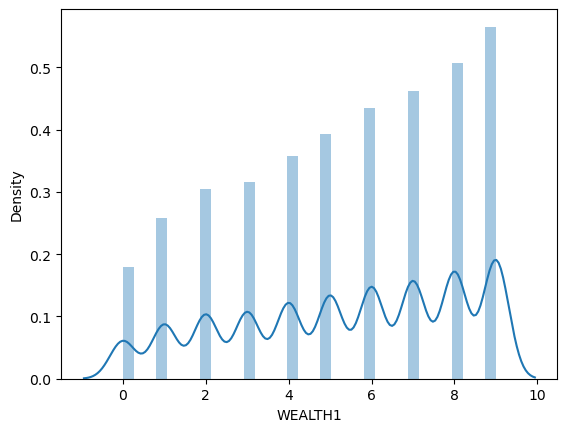

In [70]:
sns.distplot(nums[nums['WEALTH1'].isna() == False]['WEALTH1'], kde = True)
plt.show()

In [71]:
np.ceil(np.mean(nums['WEALTH1']))

6.0

In [72]:
nums['WEALTH1'] = nums['WEALTH1'].astype(object)   # converting that column into a category not a nums 
nums['WEALTH1'] = nums['WEALTH1'].fillna(np.ceil(np.mean(nums['WEALTH1'])))

As we have information about income (as categorical) we don't need another category for our analysis. We will drop that column before the model building.

## dealing with ADI

In [75]:
nums['ADI'].value_counts(dropna =False)
nums["ADI"].isna().sum()

132

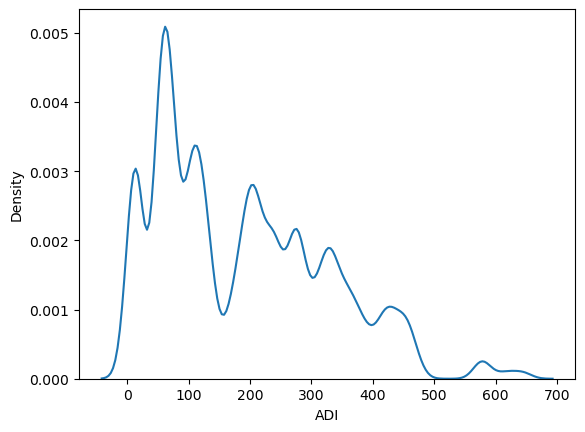

In [81]:
sns.kdeplot(nums[nums['ADI'].isna() == False]['ADI'])
plt.show()

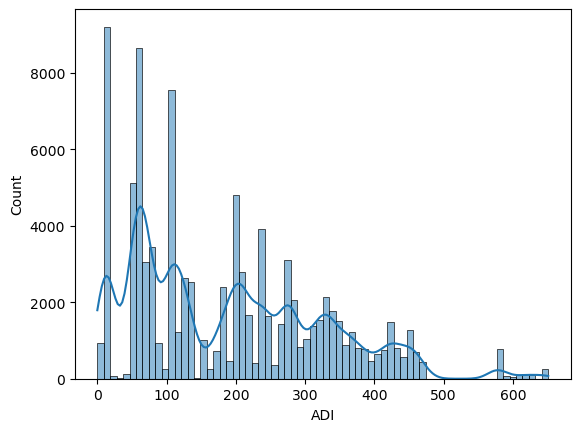

In [83]:
sns.histplot(nums[nums['ADI'].isna() == False]['ADI'], kde = True)
plt.show()

boxing outliers 

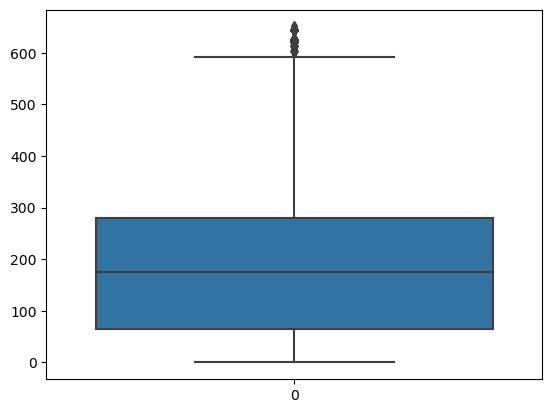

In [77]:
sns.boxplot(data = nums['ADI'])
plt.show()

Here as we don't know what is the column is about, we decide to keep it as it is and not dropping anny values.

Some informations could be lost in rows if we decide to drop, best to wait for the client to explain that column before any action.

## dealing with DMA

In [86]:
nums['DMA'].value_counts(dropna= False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [88]:
nums['DMA'].isna().sum()

132

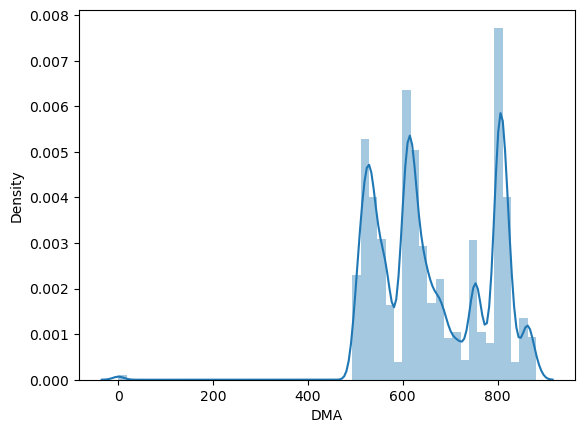

In [91]:
sns.distplot(nums[nums['DMA'].isna() == False]['DMA'], kde = True)
plt.show()

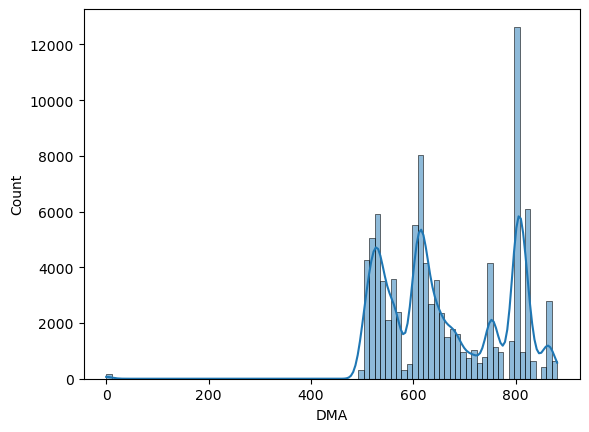

In [101]:
sns.histplot(nums[nums['DMA'].isna() == False]['DMA'], kde = True)
plt.show()

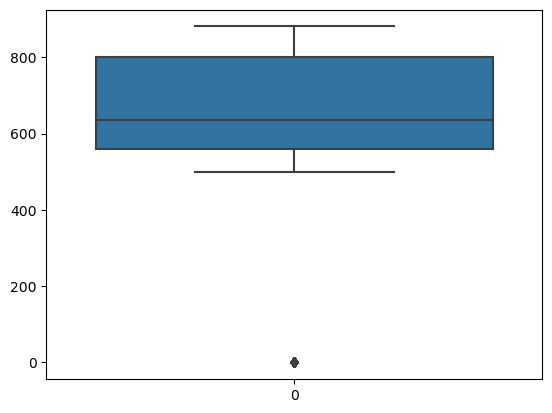

In [93]:
sns.boxplot(data = nums['DMA'])
plt.show()

## dealing with MSA

In [102]:
nums['MSA'].isna().sum()

132

In [105]:
nums['MSA'].value_counts(dropna =False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

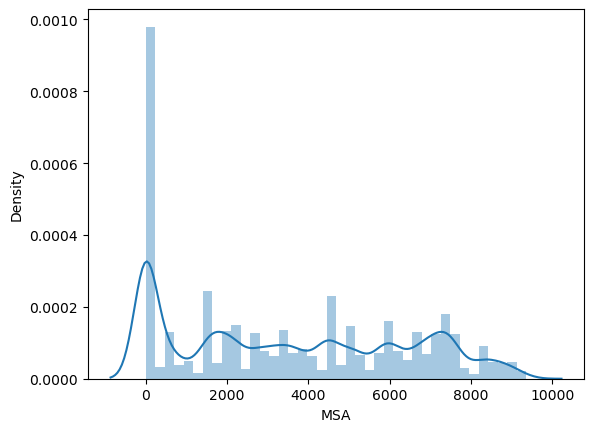

In [103]:
sns.distplot(nums[nums['MSA'].isna() == False]['MSA'], kde = True)
plt.show()

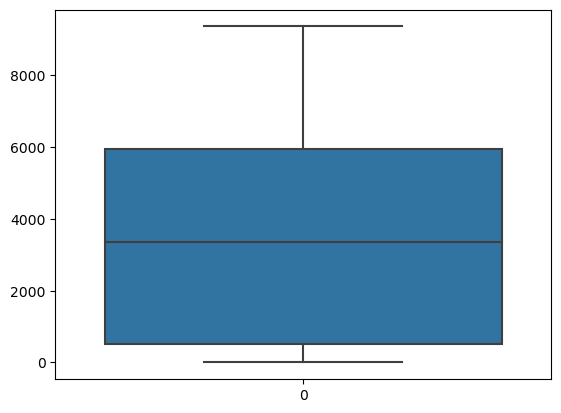

In [104]:
sns.boxplot(data = nums['MSA'])
plt.show()

In [106]:
nums['MSA'].isna().sum()

132

## we can see from the value counts of ADI, DMA, and MSA, thaht all have 132 missing values, to address this , i think we will drop those values before our model; 

but it is best to check with the client first before any rush drops !